# MODELO  NO SUPERVISADO 

In [445]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
warnings.filterwarnings('ignore')
from matplotlib.cm import viridis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [446]:
# Se carga el data set
prom1=pd.read_csv(r'..\\datasets\\prom.csv')  

In [447]:
# Se verifica el tipo de dato de cada columna
prom1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 120 entries, year to wind_energy_per_capita
dtypes: float64(120)
memory usage: 13.3 KB


In [448]:
# Se verifica que no hayan valores nulos
prom1.isna().sum()

year                      0
coal_prod_change_pct      0
coal_prod_change_twh      0
gas_prod_change_pct       0
gas_prod_change_twh       0
                         ..
wind_share_energy         0
wind_cons_change_twh      0
wind_consumption          0
wind_elec_per_capita      0
wind_energy_per_capita    0
Length: 120, dtype: int64

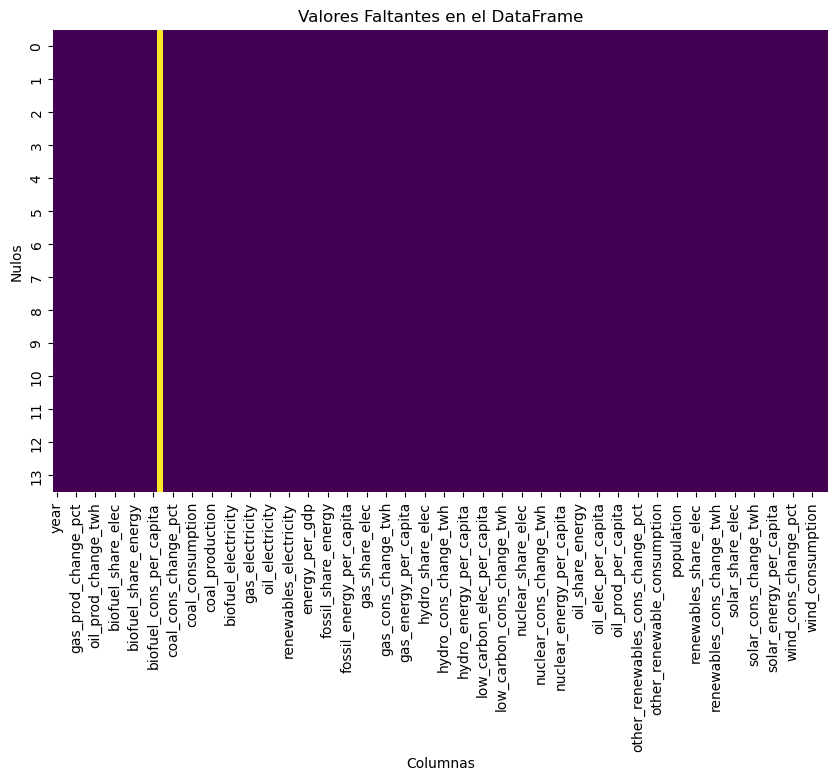

In [450]:
# Se visualiza los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(prom1.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.xlabel('Columnas')
plt.ylabel('Nulos')
plt.show()

Debido a que los países latinos selecionados no poseen información sobre la producción de electricidad proveniente del carbón se eliminará la columna.

In [451]:
# Se elimina la columna 
prom1= prom1.drop('coal_share_elec', axis=1)

In [452]:
# Se realizan códigos para la columna country que posee variables cualitativas
map_gender = {'Argentina': 1, 'Bolivia':2, 'Brazil':3, 'Chile':4, 'Colombia':5, 'Ecuador':6,'French Guiana':7, 'Guyana':8, 'Paraguay':9, 'Peru':10, 'Suriname':11,'Trinidad and Tobago':12, 'Uruguay':13, 'Venezuela':14}
prom11['country'] =prom1['country'].replace(map_gender)

KeyError: 'country'

In [453]:
# Se visualiza el set de datos
prom1

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,1960.0,14.430568,0.419392,6.419659,3.682883,11.765170,2.914992,2.077927,11.399255,1.188667,...,1.446194,1.779482,2.896098e+11,0.435722,89.628417,0.071821,0.386000,0.684518,13.058389,7.205264
1,1960.0,0.000000,0.858000,32.732802,1.244207,11.329521,-0.077975,0.150603,-13.705231,1.434140,...,25.016917,44.220000,1.371934e+10,5.787793,252.332000,1.286000,8.860000,12.371000,172.473868,276.258000
2,1960.0,5.543099,0.364421,7.709124,2.076463,11.715777,15.474405,7.054950,30.906240,3.377579,...,15.887207,25.272339,6.480281e+11,0.886876,238.776008,0.868355,6.122256,12.638132,15.385926,177.232331
3,1960.0,2.178917,0.455545,43.804355,-1.056992,14.877736,1.518215,2.807025,43.968438,8.461562,...,36.949959,63.683421,8.792690e+10,6.854620,21.862917,2.275372,9.839231,74.798438,198.805917,380.517975
4,1960.0,4.665587,5.029992,3.814306,1.161802,13.350405,4.585901,1.424785,3.117752,4.856686,...,274.443083,442.322165,1.424456e+11,5.182636,54.405231,1.537132,2.296017,7.068967,213.405306,372.419612
5,1959.5,-2.235000,-15.050000,-54.633508,0.028133,22.399208,2.857500,4.958750,12.631875,1.741517,...,2.759542,3.693317,3.609562e+10,0.024883,26.878983,0.021550,0.007275,0.091675,0.386575,2.318075
6,1999.5,-2.235000,-0.376250,-100.000000,0.000000,2.661000,8.565000,4.369200,0.195950,1.005775,...,43.936125,23.724000,1.690000e+11,0.135500,6.172000,0.102000,0.012000,0.212000,2.475000,12.190000
7,1999.5,-2.235000,0.000000,-100.000000,0.000000,2.661000,8.565000,1.782325,0.072225,2.367150,...,87.037075,23.724000,1.690000e+11,0.004725,6.172000,0.102000,0.012000,0.212000,0.064525,12.190000
8,1999.5,-2.235000,0.000000,-100.000000,0.000000,2.661000,0.214125,12.088200,7.616850,0.365700,...,5.444000,23.724000,2.932907e+10,0.018000,6.172000,0.102000,0.012000,0.212000,0.255500,12.190000
9,1960.0,2.126322,0.066843,-37.974107,1.187413,5.133479,0.544967,11.169702,19.863207,1.708653,...,0.914711,15.013421,7.066177e+10,0.127661,183.646884,0.106653,0.043066,0.274438,2.066628,11.601802


In [454]:
print(prom1.columns)

Index(['year', 'coal_prod_change_pct', 'coal_prod_change_twh',
       'gas_prod_change_pct', 'gas_prod_change_twh', 'oil_prod_change_pct',
       'oil_prod_change_twh', 'energy_cons_change_pct',
       'energy_cons_change_twh', 'biofuel_share_elec',
       ...
       'solar_elec_per_capita', 'solar_energy_per_capita', 'gdp',
       'wind_share_elec', 'wind_cons_change_pct', 'wind_share_energy',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_energy_per_capita'],
      dtype='object', length=119)


In [443]:
# Se imputan los valores nulos con el valor mediano  prom = suram1.fillna(suram1.median())
no se usa ya que no hay faltantes 

In [444]:
# Se elimina la columna iso_code     suram1=suram1.drop(['iso_code', 'country', 'year'], axis=1)
no se usa 

KeyError: "['iso_code', 'country', 'year'] not found in axis"

In [455]:
# Se observan los datos numericos, para proceder a normalizarloss
prom1.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1973.500000,3.535406,-0.580783,-20.148104,1.480312,6.182464,2.229966,4.135488,9.183138,3.517706,...,44.941788,52.877281,1.555147e+11,3.944669,65.646836,0.552598,1.995794,8.045875,139.233741,99.258282
std,19.123083,8.703350,4.372003,49.560374,2.027845,8.206467,6.410889,3.616803,14.393701,4.431766,...,72.447086,113.864261,1.747594e+11,7.509556,90.583052,0.750190,3.536267,19.745567,291.640325,144.021440
min,1959.500000,-2.235000,-15.050000,-100.000000,-1.056992,-6.163000,-13.303283,0.150603,-13.705231,0.283473,...,0.914711,1.779482,1.371934e+10,0.000000,5.523267,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,-1.676250,0.000000,-50.468658,0.007033,0.098345,-0.035084,1.856226,1.569994,1.051498,...,5.849514,5.479125,3.738360e+10,0.050578,6.919500,0.034118,0.008456,0.121756,0.806588,3.539872
50%,1960.000000,0.000000,0.040092,2.980840,1.174607,3.897240,1.031591,2.803720,4.213283,1.725085,...,18.270507,23.724000,9.692689e+10,0.661299,15.512459,0.102000,0.027533,0.243219,14.222157,12.190000
75%,1997.625000,4.043919,0.405649,6.538074,1.930205,11.752821,4.168174,4.811362,12.323720,4.361510,...,42.189583,39.483085,1.690000e+11,4.961221,80.822620,1.164339,1.818512,6.320725,175.638619,164.270498
max,2000.000000,29.491192,5.029992,43.804355,5.960782,22.399208,15.474405,12.088200,43.968438,16.817500,...,274.443083,442.322165,6.480281e+11,28.559975,252.332000,2.275372,9.839231,74.798438,1108.403708,380.517975


In [456]:
# Se verifican los tipos de datos de todas las columnas
t_datos_suram1= prom1[['coal_prod_change_pct','coal_prod_change_twh',	'gas_prod_change_pct','gas_prod_change_twh','oil_prod_change_pct',	'oil_prod_change_twh',	'energy_cons_change_pct',	'energy_cons_change_twh','biofuel_share_elec','biofuel_elec_per_capita','biofuel_cons_change_pct','biofuel_share_energy','biofuel_cons_change_twh','biofuel_consumption','biofuel_cons_per_capita','carbon_intensity_elec','coal_cons_change_pct','coal_share_energy','coal_cons_change_twh','coal_consumption','coal_elec_per_capita','coal_cons_per_capita','coal_production','coal_prod_per_capita','electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','other_renewable_electricity','other_renewable_exc_biofuel_electricity','renewables_electricity','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_cons_change_pct','fossil_share_energy','fossil_cons_change_twh','fossil_fuel_consumption','fossil_energy_per_capita','fossil_cons_per_capita','fossil_share_elec','gas_share_elec','gas_cons_change_pct','gas_share_energy','gas_cons_change_twh','gas_consumption','gas_elec_per_capita','gas_energy_per_capita','gas_production','gas_prod_per_capita','hydro_share_elec','hydro_cons_change_pct','hydro_share_energy','hydro_cons_change_twh','hydro_consumption','hydro_elec_per_capita','hydro_energy_per_capita','low_carbon_share_elec','low_carbon_electricity','low_carbon_elec_per_capita','low_carbon_cons_change_pct','low_carbon_share_energy','low_carbon_cons_change_twh','low_carbon_consumption','low_carbon_energy_per_capita','nuclear_share_elec','nuclear_cons_change_pct','nuclear_share_energy','nuclear_cons_change_twh','nuclear_consumption','nuclear_elec_per_capita','nuclear_energy_per_capita','oil_share_elec','oil_cons_change_pct','oil_share_energy','oil_cons_change_twh','oil_consumption','oil_elec_per_capita','oil_energy_per_capita','oil_production','oil_prod_per_capita','other_renewables_elec_per_capita','other_renewables_share_elec','other_renewables_cons_change_pct','other_renewables_share_energy','other_renewables_cons_change_twh','other_renewable_consumption','other_renewables_energy_per_capita','per_capita_electricity','population','primary_energy_consumption','renewables_elec_per_capita','renewables_share_elec','renewables_cons_change_pct','renewables_share_energy','renewables_cons_change_twh','renewables_consumption','renewables_energy_per_capita','solar_share_elec','solar_cons_change_pct','solar_share_energy','solar_cons_change_twh','solar_consumption','solar_elec_per_capita','solar_energy_per_capita','gdp','wind_share_elec','wind_cons_change_pct','wind_share_energy','wind_cons_change_twh','wind_consumption','wind_elec_per_capita','wind_energy_per_capita']].dtypes
print(t_datos_suram1)

coal_prod_change_pct      float64
coal_prod_change_twh      float64
gas_prod_change_pct       float64
gas_prod_change_twh       float64
oil_prod_change_pct       float64
                           ...   
wind_share_energy         float64
wind_cons_change_twh      float64
wind_consumption          float64
wind_elec_per_capita      float64
wind_energy_per_capita    float64
Length: 118, dtype: object


In [ ]:
#Calcular el rango intercuartílico (IQR)
Q1 = suram1['hydro_share_elec'].quantile(0.25)
Q3 = suram1['hydro_share_elec'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = (suram1['hydro_share_elec'] < lower_bound) | (suram1['hydro_share_elec'] > upper_bound)
x = suram1[~outliers]

In [459]:
#Se escalan los datos
p1_scal = (prom1-prom1.min())/(prom1.max()-prom1.min())
p1_scal

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,0.012346,0.525294,0.770388,0.740031,0.675410,0.627688,0.563571,0.161450,0.435285,0.054747,...,0.001943,0.000000,0.434947,0.015256,0.340771,0.031565,0.039231,0.009151,0.011781,0.018935
1,0.012346,0.070447,0.792231,0.923010,0.327910,0.612436,0.459568,0.000000,0.000000,0.069594,...,0.088116,0.096337,0.000000,0.202654,1.000000,0.565182,0.900477,0.165391,0.155606,0.726005
2,0.012346,0.245163,0.767651,0.748998,0.446503,0.625959,1.000000,0.578370,0.773515,0.187136,...,0.054738,0.053327,1.000000,0.031053,0.945075,0.381632,0.622229,0.168963,0.013881,0.465766
3,0.012346,0.139125,0.772189,1.000000,0.000000,0.736663,0.515034,0.222526,1.000000,0.494622,...,0.131742,0.140517,0.116990,0.240008,0.066204,1.000000,1.000000,1.000000,0.179362,1.000000
4,0.012346,0.217504,1.000000,0.721914,0.316168,0.683190,0.621634,0.106737,0.291693,0.276594,...,1.000000,1.000000,0.202939,0.181465,0.198056,0.675552,0.233353,0.094507,0.192534,0.978718
5,0.000000,0.000000,0.000000,0.315474,0.154625,1.000000,0.561573,0.402773,0.456657,0.088184,...,0.006745,0.004344,0.035277,0.000871,0.086527,0.009471,0.000739,0.001226,0.000349,0.006092
6,0.987654,0.000000,0.730765,0.000000,0.150616,0.308940,0.759904,0.353387,0.241032,0.043686,...,0.157283,0.049812,0.244803,0.004744,0.002628,0.044828,0.001220,0.002834,0.002233,0.032035
7,0.987654,0.000000,0.749502,0.000000,0.150616,0.308940,0.759904,0.136688,0.238886,0.126024,...,0.314857,0.049812,0.244803,0.000165,0.002628,0.044828,0.001220,0.002834,0.000058,0.032035
8,0.987654,0.000000,0.749502,0.000000,0.150616,0.308940,0.469718,1.000000,0.369702,0.004973,...,0.016559,0.049812,0.024609,0.000630,0.002628,0.044828,0.001220,0.002834,0.000231,0.032035
9,0.012346,0.137468,0.752831,0.431321,0.319817,0.395504,0.481215,0.923058,0.582041,0.086197,...,0.000000,0.030040,0.089771,0.004470,0.721707,0.046873,0.004377,0.003669,0.001865,0.030489


In [490]:
# Se seleccionan las variables a analizar

x=p1_scal[['hydro_consumption', 'hydro_electricity']].values
pd.DataFrame(x).head(5)

,0,1
0,0.113792,0.098453
1,0.167155,0.061937
2,0.599299,0.330582
3,1.000000,1.000000
4,0.111734,0.090263


In [491]:
# Se seleccionan las variables a analizar
pd.DataFrame(x).head(5)

,0,1
0,0.113792,0.098453
1,0.167155,0.061937
2,0.599299,0.330582
3,1.000000,1.000000
4,0.111734,0.090263


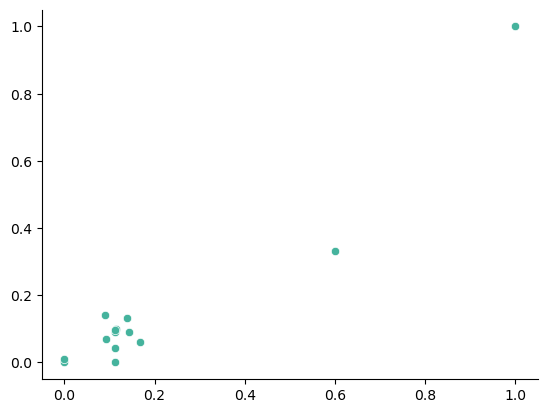

In [492]:
sns.scatterplot(x = x[:,0], y = x[:,1], color='#45B39D')
sns.despine()
plt.show()

## Método del codo:
Se realiza el método del codo para conocer los posibles clusters en que se clasificará el modelo. Dependiendo delos valores que arroje se realizarán las pruebas pertinentes.



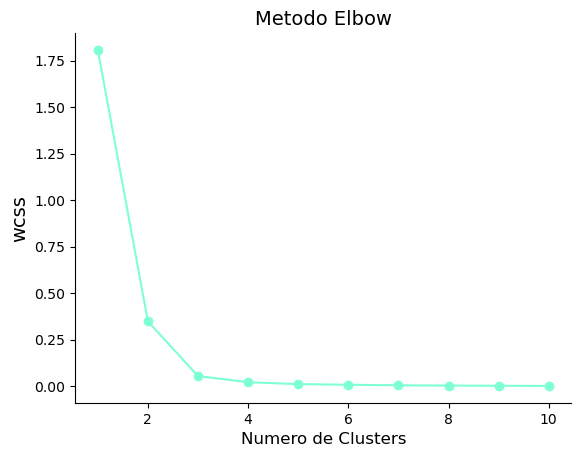

In [493]:
#Se realiza el método del codo para determinar la cantidad de clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1, 11), wcss, marker='o',c="#7FFFD4")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Elbow', size=14)
plt.xlabel('Numero de Clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

Se observa que el grafico arroja un numero de clusters que esta entre 3 y 4 que son punto en donde se aprecia que comienza a disminuir bruscamente (punto de quiebre) la variación. A contnuación se verificarán los tres tipos de números de clusters para determinar cual tiene mejor desempeño.

## Cantidad de clusters: 4

In [494]:
# Se instancia el modelo con el numero de clusters=4
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(x)
KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=4, random_state=0)

In [495]:
# Se realizan las etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)

array([0, 1, 2, 3])

In [496]:
# Se realiza la predicción:
y_means4=kmeansmodel4.fit_predict(x)

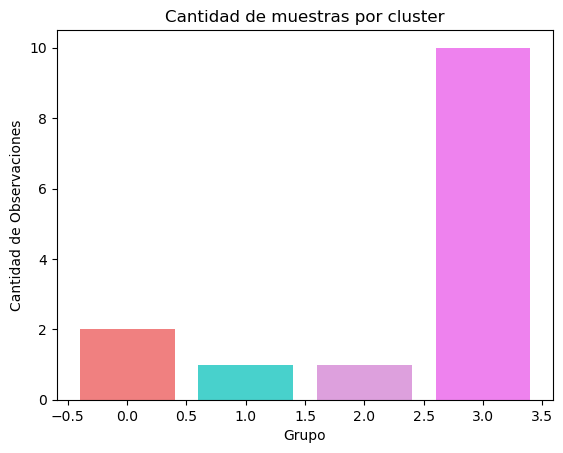

In [497]:
#Se verifica la cantidad de observaciones (4 clusters)
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum', 'violet']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 4 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [498]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[0.         0.00614687]
 [1.         1.        ]
 [0.5992987  0.33058242]
 [0.1190164  0.08241292]]


## Cantidad de clusters: 3

In [499]:
# Se instancia el modelo con el numero de clusters=3
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(x)
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

In [500]:
# Se realizan las etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)

array([0, 1, 2])

In [501]:
# Se realiza la predicción:
y_means3=kmeansmodel3.fit_predict(x)

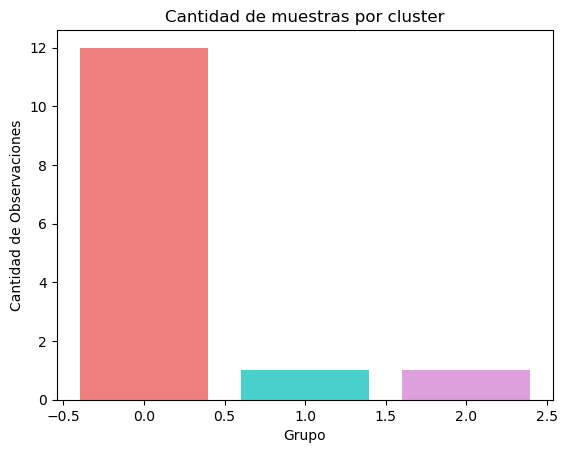

In [502]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 3 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [503]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[0.09918033 0.06970192]
 [1.         1.        ]
 [0.5992987  0.33058242]]


## Cantidad de clusters: 2

In [504]:
# Se instancia el modelo con el numero de clusters=2
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(x)
KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=2, random_state=0)

In [505]:
# Se realizan las etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)

array([0, 1])

In [506]:
# Se realiza la predicción:
y_means2=kmeansmodel2.fit_predict(x)

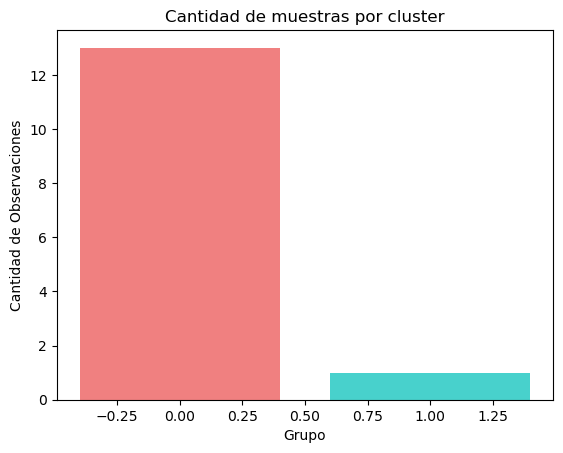

In [507]:
#Se verifica la cantidad de observaciones (3 clusters)
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

Se observa que la distribución de las muestras en 2 clusters no es igual en cada grupo. Se analizará posteriormente la distribución en las otras posibilidades de cantidad de clusters.

In [508]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[0.09918033 0.06970192]
 [1.         1.        ]
 [0.5992987  0.33058242]]


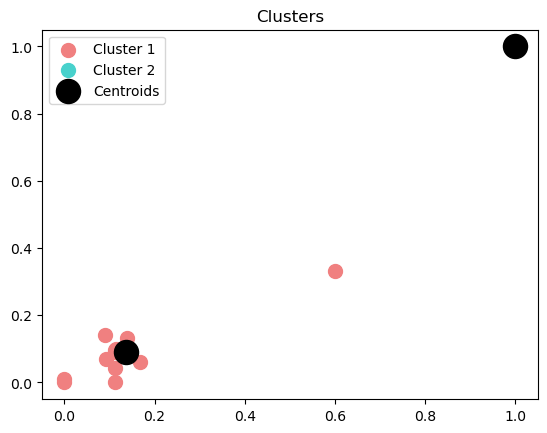

In [513]:
# 
plt.scatter(x[y_means2 == 0, 0], x[y_means2 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means2 == 1, 0], x[y_means2 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

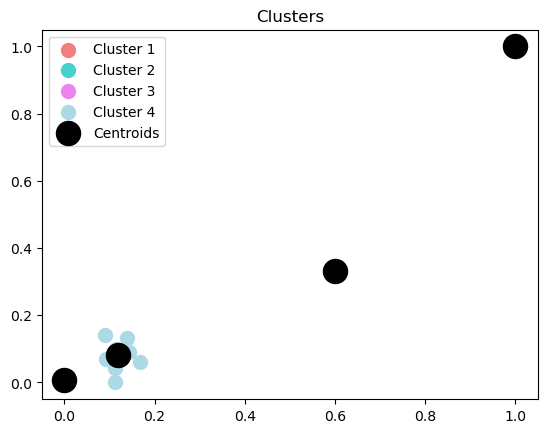

In [510]:
# 
plt.scatter(x[y_means4 == 0, 0], x[y_means4 == 0, 1], s = 100, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(x[y_means4 == 1, 0], x[y_means4 == 1, 1], s = 100, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(x[y_means4 == 2, 0], x[y_means4 == 2, 1], s = 100, c = 'violet', label = 'Cluster 3')
plt.scatter(x[y_means4 == 3, 0], x[y_means4 == 3, 1], s = 100, c = 'lightblue', label = 'Cluster 4')
plt.scatter(kmeansmodel4.cluster_centers_[:, 0], kmeansmodel4.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

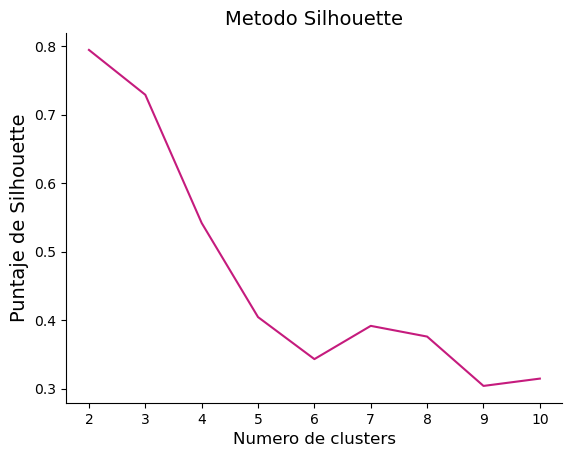

In [512]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(x)
    labels = kmeans.labels_
    sil.append(silhouette_score(x, labels, metric='euclidean'))
plt.plot(range(2,11),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_1 = DBSCAN(eps=0.3, min_samples=10)

In [ ]:
dbscan_1.fit(x)

In [ ]:
# Consultamos las etiquetas
labels_1 = dbscan_1.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [ ]:
def plot_DBSCAN(x,labels_1,db_1,n_clusters_1):
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
        for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:col = [0, 0, 0, 1]
        class_member_mask = (labels_1 == k)
        xy = x[class_member_mask & core_samples_mask_1]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=14)
xy

 = x[class_member_mask & ~core_samples_mask_1]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor='k', markersize=6)
plt.title('Numero estimado de clusters: %d' % n_clusters_1)
plt.show()

In [ ]:
print('Numero estimado de clusters: %d' % n_clusters_1)
print('Numero estimado de puntos outliers: %d' % n_noise_1)